In [9]:
#pip install seaborn

In [73]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_csv("Data/billionaires-by-country-2025.csv")
data

,flagCode,country,Billionaires_2024,BillionairesRate_2024,BillionairesRichestBillionaire_2024,BillionairesRichestNetWorth_2024
0,US,United States,813,2.420,Elon Musk,195.0
1,CN,China,406,0.288,Zhong Shanshan,62.3
2,IN,India,200,0.144,Mukesh Ambani,116.0
3,DE,Germany,132,1.560,Klaus-Michael Kuehne,39.2
4,RU,Russia,120,0.821,Vagit Alekperov,28.6
...,...,...,...,...,...,...
69,IS,Iceland,1,2.519,Thor Bjorgolfsson,2.1
70,BB,Barbados,1,3.734,Rihanna,1.4
71,GG,Guernsey,1,15.602,Stephen Lansdown,2.6
72,LI,Liechtenstein,1,25.174,Christoph Zeller,1.5


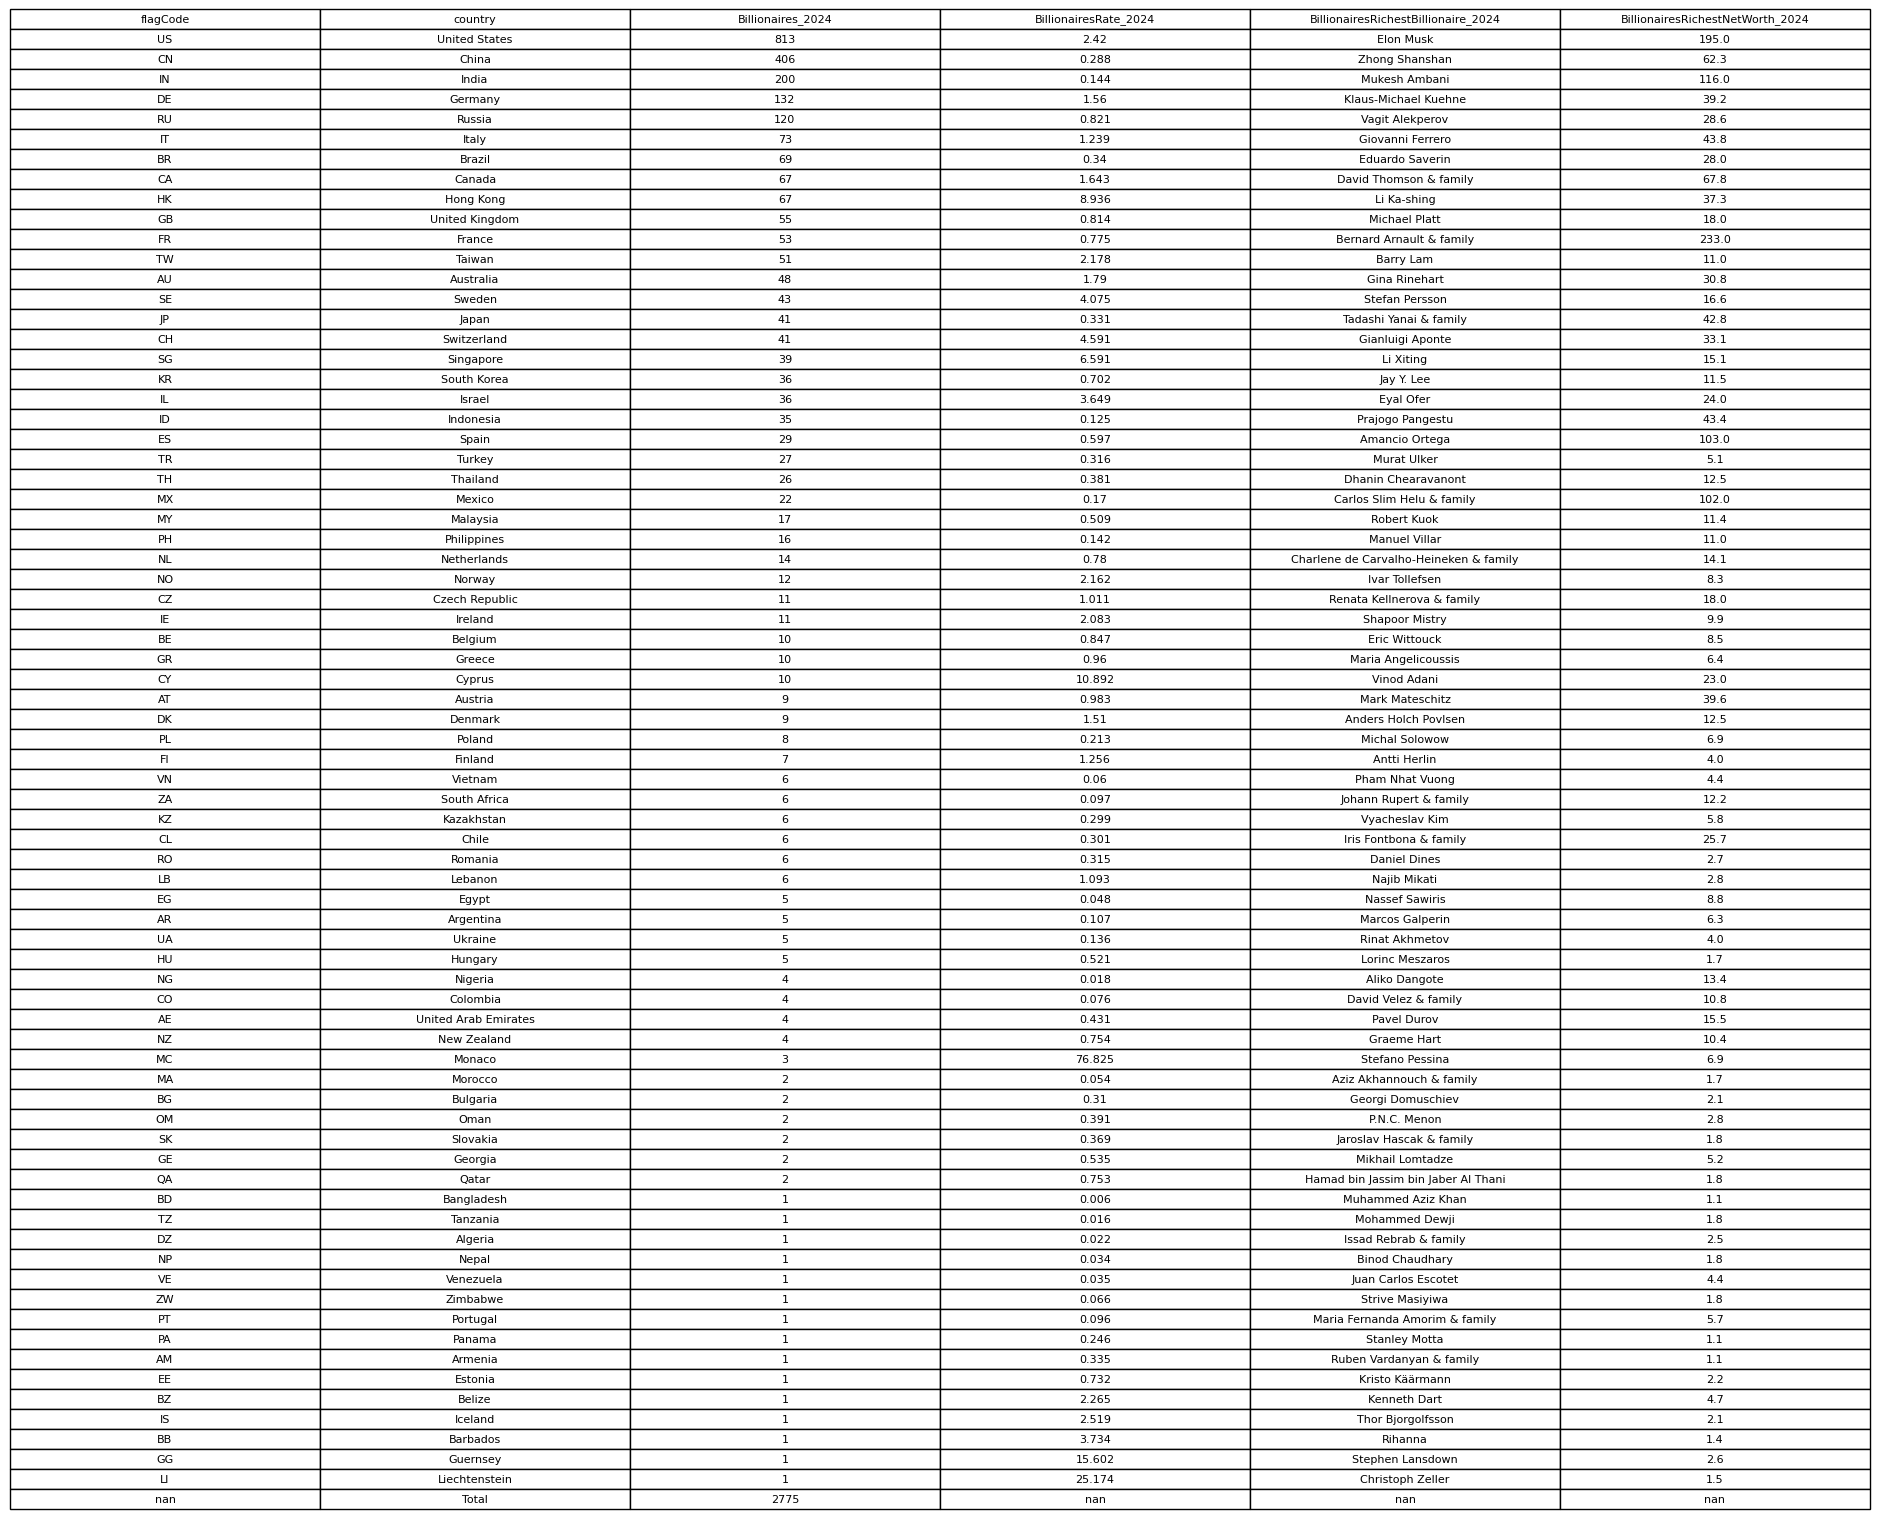

In [134]:
# Create figure
fig, ax = plt.subplots(figsize=(20, 16))  # adjust size
ax.axis("off")

# Render DataFrame as table in matplotlib
tbl = ax.table(
    cellText=data.values,
    colLabels=data.columns,
    loc="center",
    cellLoc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(8)       # adjust text size
tbl.scale(1.2, 1.2)       # adjust scaling

plt.savefig("billionaires_table.png", dpi=300, bbox_inches="tight")
plt.show()

In [75]:
# Read shapefile
world = gpd.read_file('Data/World_Map.shp')
world

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [76]:
world.rename(columns={'NAME': 'country'}, inplace=True)
world

,country,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [77]:
world.set_index('country')
print(world.columns)

Index(['country', 'geometry'], dtype='object')


world.replace('Viet Nam','Vietnam', inplace = True)
world.replace('Brunei Darussalam','Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world.replace('Congo','Congo (Brazzaville)', inplace = True)
world.replace('Iran (Islamic Republic of)','Iran ', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace('United States','US', inplace = True)
world.replace('Palestine', 'West Bank and Gaza', inplace = True)

In [78]:
df = world.merge(data, on = "country", how = "left" )
df

,country,geometry,flagCode,Billionaires_2024,BillionairesRate_2024,BillionairesRichestBillionaire_2024,BillionairesRichestNetWorth_2024
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",NaN,NaN,NaN,NaN,NaN
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",DZ,1.0,0.022,Issad Rebrab & family,2.5
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",NaN,NaN,NaN,NaN,NaN
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",NaN,NaN,NaN,NaN,NaN
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",AM,1.0,0.335,Ruben Vardanyan & family,1.1
...,...,...,...,...,...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",NaN,NaN,NaN,NaN,NaN
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",GG,1.0,15.602,Stephen Lansdown,2.6
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ...",NaN,NaN,NaN,NaN,NaN
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",NaN,NaN,NaN,NaN,NaN


In [86]:
bd = df[df["flagCode"] == "BD"]
bd

,country,geometry,flagCode,Billionaires_2024,BillionairesRate_2024,BillionairesRichestBillionaire_2024,BillionairesRichestNetWorth_2024
13,Bangladesh,"MULTIPOLYGON (((91.89749 21.47666, 91.88693 21...",BD,1.0,0.006,Muhammed Aziz Khan,1.1


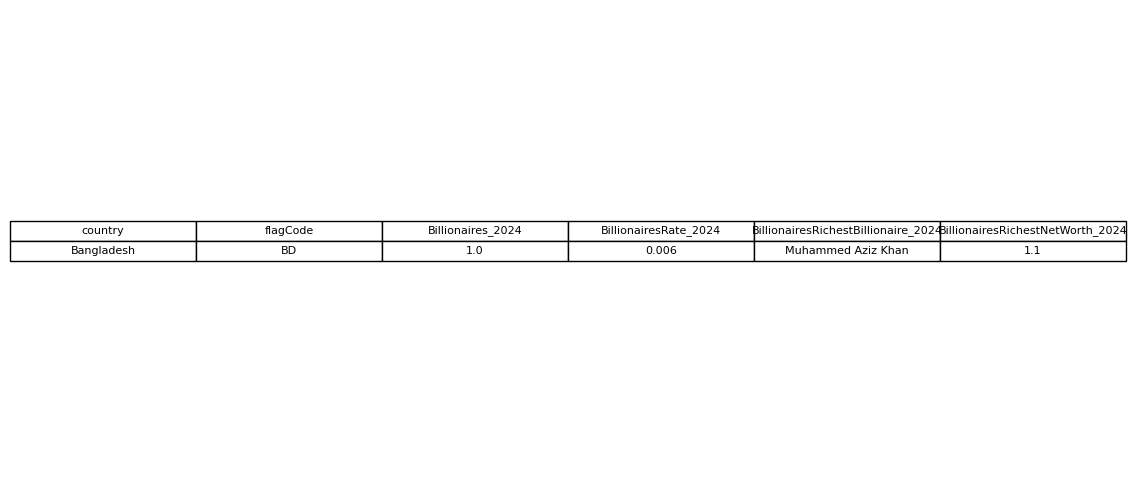

In [125]:
# Drop geometry so only table values remain
table = bd.drop(columns="geometry")

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))  # adjust size
ax.axis("off")

# Render DataFrame as table in matplotlib
tbl = ax.table(
    cellText=table.values,
    colLabels=table.columns,
    loc="center",
    cellLoc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(8)       # adjust text size
tbl.scale(1.2, 1.2)       # adjust scaling

plt.savefig("billionaires_table_bd.png", dpi=300, bbox_inches="tight")
plt.show()

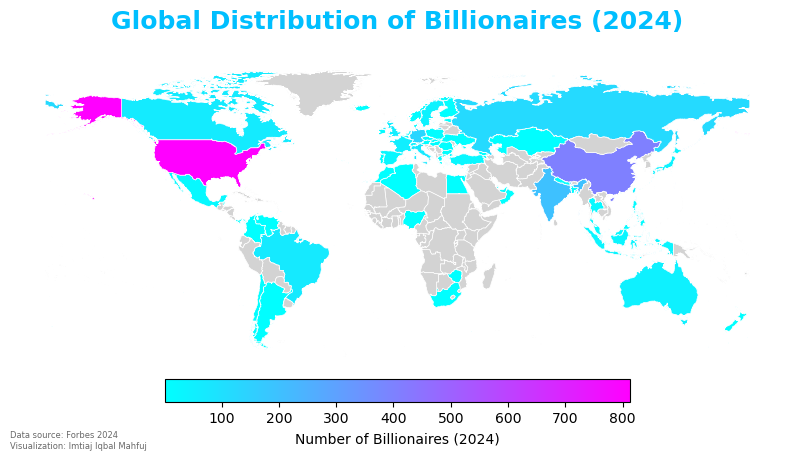

In [151]:
fig, ax = plt.subplots(1,1, figsize = (10,5))

df.plot(column="Billionaires_2024", cmap = 'cool', 
        linewidth=0.5, edgecolor="white", 
        
        legend=True, 
        
        legend_kwds={
        "label": "Number of Billionaires (2024)",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.02},
        
        missing_kwds={
        "color": "lightgrey",
        #"edgecolor": "white",
        #"hatch": "///",
        "label": "No data"
        },
        ax=ax)

# Add title and styling
ax.set_title("Global Distribution of Billionaires (2024)", fontsize=18, fontweight="bold", 
             pad=20, color="deepskyblue")
ax.axis("off")  # remove axes

# Add text at bottom using axes coordinates (0-1)
ax.text(
    0.0, -0.25,                     # x=0.5 center, y=-0.05 slightly below axes
    "Data source: Forbes 2024 \nVisualization: Imtiaj Iqbal Mahfuj",
    ha="left", va="bottom",           # center horizontally, top-align vertically
    fontsize=6, color="dimgray",
    transform=ax.transAxes           # important: use axes coordinates
)

plt.savefig("billionaires_map.png", dpi=300, bbox_inches="tight")
plt.show()


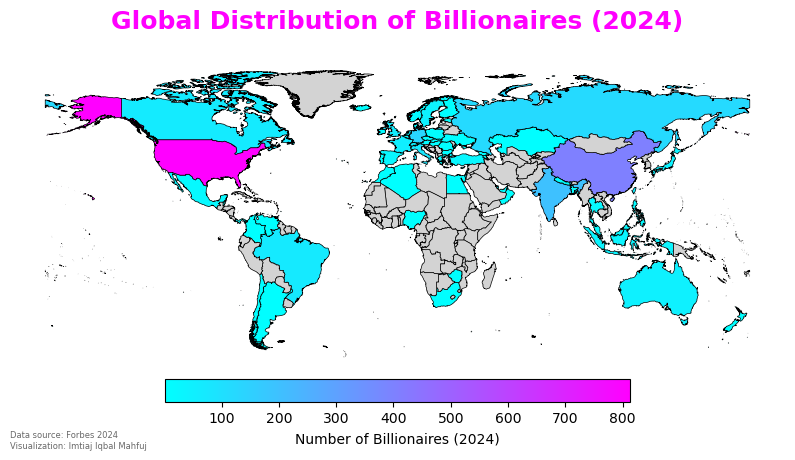

In [147]:
fig, ax = plt.subplots(1,1, figsize = (10,5))

df.plot(column="Billionaires_2024", cmap = 'cool', 
        linewidth=0.5, edgecolor="black", 
        
        legend=True, 
        
        legend_kwds={
        "label": "Number of Billionaires (2024)",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.02},
        
        missing_kwds={
        "color": "lightgrey",
        #"edgecolor": "white",
        #"hatch": "///",
        "label": "No data"
        },
        ax=ax)

# Add title and styling
ax.set_title("Global Distribution of Billionaires (2024)", fontsize=18, fontweight="bold", pad=20, color="magenta")
ax.axis("off")  # remove axes

# Add text at bottom using axes coordinates (0-1)
ax.text(
    0.0, -0.25,                     # x=0.5 center, y=-0.05 slightly below axes
    "Data source: Forbes 2024 \nVisualization: Imtiaj Iqbal Mahfuj",
    ha="left", va="bottom",           # center horizontally, top-align vertically
    fontsize=6, color="dimgray",
    transform=ax.transAxes           # important: use axes coordinates
)

plt.savefig("billionaires_map.png", dpi=300, bbox_inches="tight")
plt.show()
